In [14]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

# Plot Colors
blue_color  = '#348ABD'
red_color   = '#A60628'

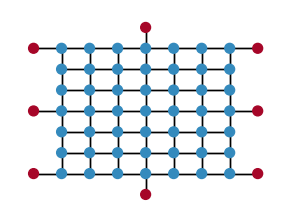

In [15]:
# Network Style
network_topology    = "cubic"
N                   = 7

# Network Parameter
topology_parameter  = {
    "Nx"    : N,
    "Ny"    : N,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[int((N-1)/2),0,0],[0,int((N-1)/2),0],[N-1,0,0],[0,N-1,0],[N-1,int((N-1)/2),0],[int((N-1)/2),N-1,0],[N-1,N-1,0]]
}

# Topology Class
np_network_sim  = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)
fig, ax         = nanonets_utils.display_network(np_network_sim, node_size=50)

In [16]:
# voltages = np.random.uniform(low=-0.05, high=0.05, size=(50,9))
voltages = np.zeros((50,9))
voltages[:,6] = np.linspace(-0.1,0.1,50)

In [17]:
outs = []
pots = []
char = []
jump = []

sim_dic = {
    'error_th' : 0.05,
    'max_jumps' : 1000000,
    'eq_steps' : 100000
}

for _ in tqdm(range(5)):
    
    np_network_sim = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)
    np_network_sim.run_const_voltages(voltages=voltages, target_electrode=7, save_th=0.1, sim_dic=sim_dic)
    
    outs.append(pd.DataFrame(np_network_sim.return_output_values()))
    pots.append(pd.DataFrame(np_network_sim.return_potential_landscape()))
    char.append(pd.DataFrame(np_network_sim.return_microstates()))
    jump.append(pd.DataFrame(np_network_sim.return_network_currents()[1]))

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [01:04<00:00, 12.96s/it]


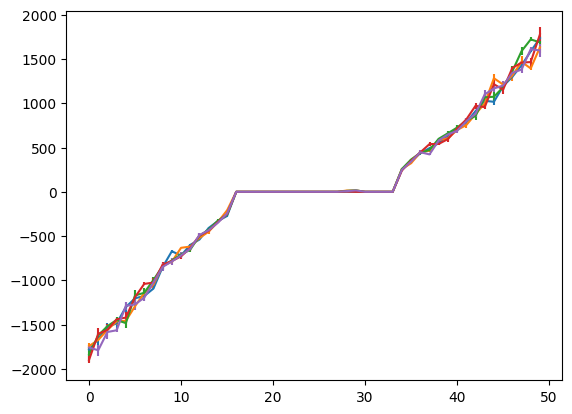

In [33]:
for df in outs:
    plt.errorbar(range(50), df[2], df[3])

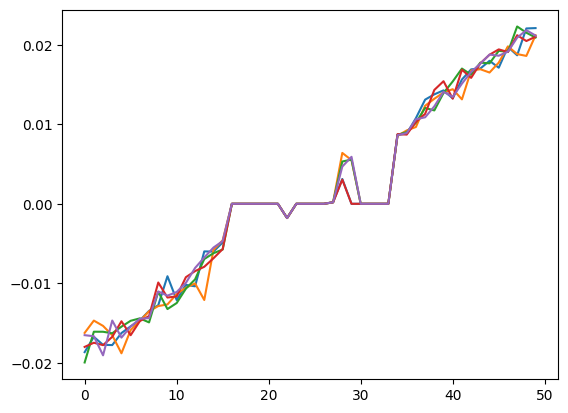

In [34]:
for df in pots:
    plt.plot(range(50), df[30])

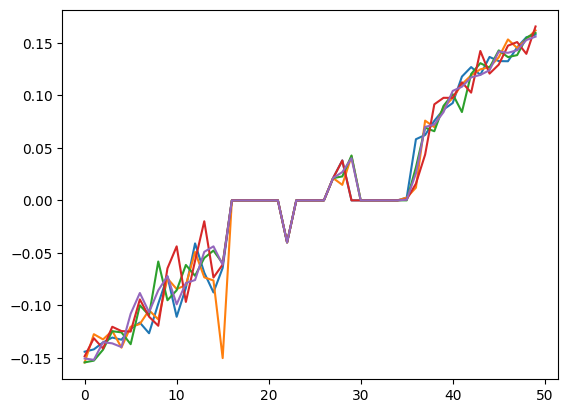

In [35]:
for df in char:
    plt.plot(range(50), df[24])

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,16.452471,82.262356,822.623560,32.904942,1842.676775,740.361204,0.000000,1760.414419,0.000000,0.000000,...,0.000000,16.452471,1875.581718,0.000000,131.619770,1513.627351,0.000000,0.000000,180.977183,1.595890e+03
1,41.141804,51.427255,637.697960,61.712706,1697.099409,627.412509,0.000000,1789.668468,0.000000,20.570902,...,0.000000,20.570902,1830.810272,0.000000,82.283608,1563.388547,0.000000,0.000000,267.421725,1.522247e+03
2,59.201042,118.402084,510.608987,44.400782,1650.229046,636.411202,0.000000,1583.627874,0.000000,22.200391,...,0.000000,0.000000,1694.629828,0.000000,118.402084,1383.824357,0.000000,0.000000,199.803517,1.391224e+03
3,50.481027,75.721540,530.050781,12.620257,1274.645925,530.050781,0.000000,1564.911828,0.000000,37.860770,...,0.000000,25.240513,1577.532085,0.000000,12.620257,1362.987721,0.000000,0.000000,252.405134,1.325127e+03
4,24.473338,138.682247,497.624535,8.157779,1370.506915,522.097873,0.000000,1288.929123,0.000000,16.315559,...,0.000000,16.315559,1394.980253,0.000000,65.262234,1133.931317,0.000000,0.000000,195.786702,1.093142e+03
5,50.675267,78.828193,411.032722,45.044682,1233.098165,467.338574,0.000000,1266.881677,0.000000,28.152926,...,0.000000,11.261170,1317.556944,0.000000,67.567023,1092.333535,0.000000,0.000000,135.134046,1.126117e+03
6,10.052384,50.261922,392.042988,40.209537,1135.919427,361.885835,0.000000,1196.233733,0.000000,10.052384,...,0.000000,60.314306,1226.390886,0.000000,70.366690,1025.343200,0.000000,0.000000,150.785765,1.045448e+03
7,8.762991,61.340934,332.993643,17.525981,1016.506910,332.993643,0.000000,1025.269901,0.000000,0.000000,...,0.000000,52.577944,1016.506910,0.000000,96.392897,876.299061,0.000000,0.000000,78.866915,9.464030e+02
8,20.436042,40.872084,306.540630,25.545053,842.986734,326.976672,0.000000,848.095744,0.000000,5.109011,...,5.109011,10.218021,924.730902,0.000000,25.545053,771.460587,0.000000,0.000000,91.962189,7.612426e+02
9,18.294412,33.975336,209.078989,13.067437,760.524822,269.189198,0.000000,784.046208,0.000000,10.453949,...,0.000000,2.613487,750.070872,0.000000,44.429285,650.758353,0.000000,0.000000,99.312520,6.847337e+02


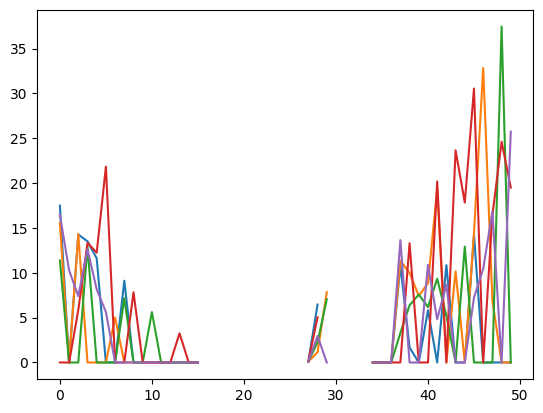

In [41]:
for df in jump:
    plt.plot(range(50), df[22])